In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('CapstoneData.csv')  


In [7]:
grouped = (
    df.groupby(['REGION_NAME', 'BNF_CHEMICAL_SUBSTANCE'])['ITEMS']
    .sum()
    .reset_index()
)


In [8]:

top5_by_region = (
    grouped.groupby('REGION_NAME')
    .apply(lambda x: x.nlargest(5, 'ITEMS'))
    .reset_index(drop=True)
)

top5_by_region.head()


,REGION_NAME,BNF_CHEMICAL_SUBSTANCE,ITEMS
0,EAST OF ENGLAND,Atorvastatin,715563
1,EAST OF ENGLAND,Amlodipine,388108
2,EAST OF ENGLAND,Levothyroxine sodium,365127
3,EAST OF ENGLAND,Lansoprazole,334619
4,EAST OF ENGLAND,Omeprazole,333471


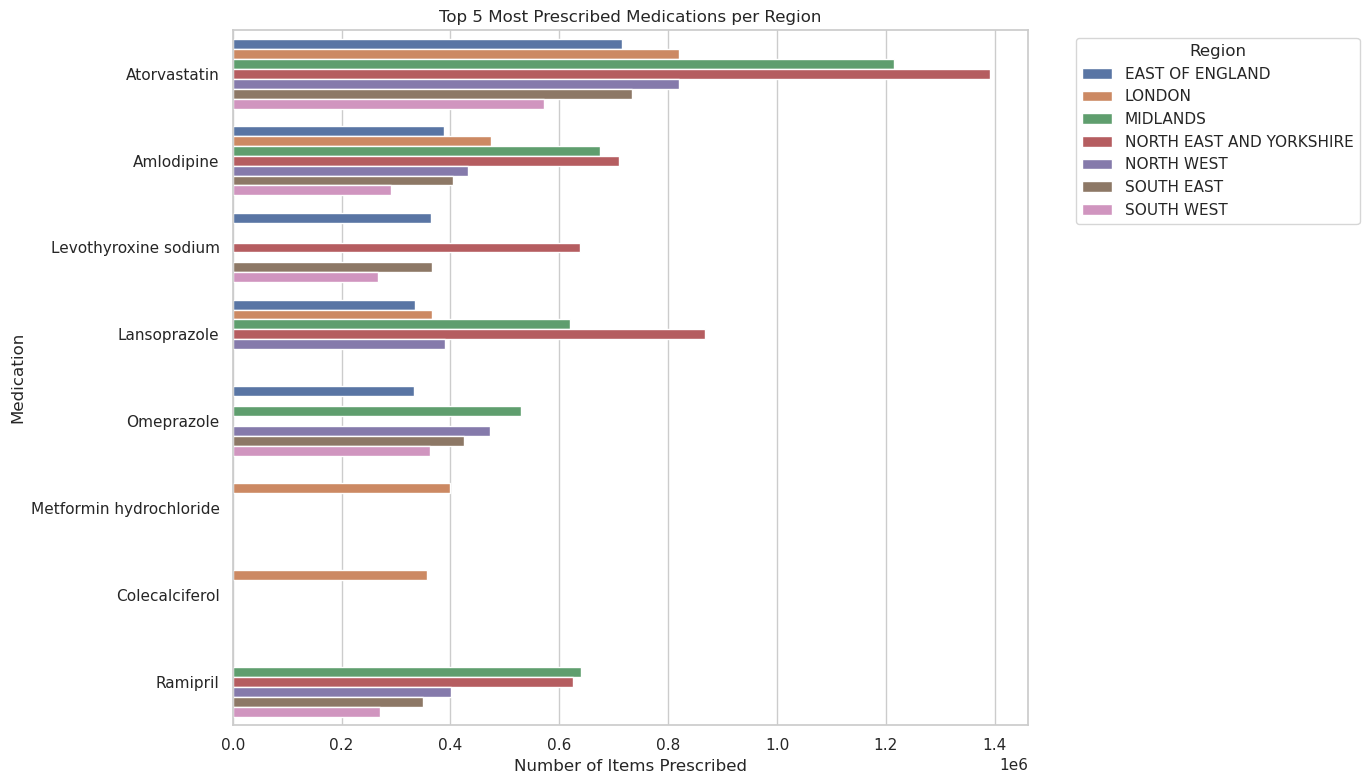

In [9]:
sns.set(style="whitegrid")

plt.figure(figsize=(14, 8))
sns.barplot(
    data=top5_by_region,
    x='ITEMS',
    y='BNF_CHEMICAL_SUBSTANCE',
    hue='REGION_NAME'
)

plt.title('Top 5 Most Prescribed Medications per Region')
plt.xlabel('Number of Items Prescribed')
plt.ylabel('Medication')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
